### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [32]:
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [33]:
data = pd.read_csv('data/coupons.csv')

In [34]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [35]:
# take a peek at any columns with null values
na_check = data.isnull().sum()
print(na_check)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [36]:
# look at the unique values
for col in data.columns:
    print(data[col].value_counts(), end = '\n\n')

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

expiration
1d    7091
2h    5593
Name: count, dtype: int64

gender
Female    6511
Male      6173
Name: count, dtype: int64

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

maritalStatus
Married partner      5100
Single               475

In [37]:
# look at shape of the data
data.shape

(12684, 26)

In [38]:
# set display options
pd.set_option('display.max_columns', 500)

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.width', 150)
# pd.reset_option('display.max_colwidth')

In [39]:
# hone in on the problem columns: 
"""
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
"""
# starting with car
data[data['car'].isnull()].head()

# since there are only very few non-null rows, dropping the column later

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [40]:
# now investigating sample null rows for the remaining columns
na_cols = na_check.loc[ na_check > 0 ].index.tolist()
na_cols.remove('car')

for c in na_cols:
    print(c)
    display(data[data[c].isnull()].sample(5))

Bar


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2380,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,0,Some college - no degree,Computer & Mathematical,$87500 - $99999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
12167,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,less1,gt8,1~3,less1,1,0,0,0,1,0
12155,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,less1,gt8,1~3,less1,1,0,0,0,1,0
2381,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,0,Some college - no degree,Computer & Mathematical,$87500 - $99999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
10382,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Male,41,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,$37500 - $49999,NaN,NaN,less1,1~3,4~8,1~3,1,1,0,0,1,1


CoffeeHouse


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
509,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,26,Unmarried partner,0,Bachelors degree,Community & Social Services,$12500 - $24999,NaN,never,NaN,less1,less1,less1,1,1,0,0,1,1
8797,Home,Alone,Sunny,80,6PM,Bar,2h,Male,26,Married partner,0,Bachelors degree,Computer & Mathematical,$100000 or More,NaN,4~8,NaN,1~3,1~3,less1,1,0,0,1,0,1
11850,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Unmarried partner,0,Graduate degree (Masters or Doctorate),Healthcare Practitioners & Technical,$25000 - $37499,NaN,less1,NaN,1~3,never,never,1,1,0,0,1,0
6585,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(20-50),2h,Male,36,Married partner,1,Associates degree,Management,$87500 - $99999,NaN,never,NaN,less1,less1,never,1,1,0,0,1,0
499,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,0,Bachelors degree,Community & Social Services,$12500 - $24999,NaN,never,NaN,less1,less1,less1,1,1,0,0,1,0


CarryAway


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4738,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,below21,Single,0,Some college - no degree,Student,$87500 - $99999,NaN,never,4~8,NaN,4~8,less1,1,1,1,0,1,1
3572,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,0,Bachelors degree,Arts Design Entertainment Sports & Media,$50000 - $62499,NaN,gt8,1~3,NaN,4~8,less1,1,1,0,0,1,0
8633,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Female,26,Married partner,0,Bachelors degree,Unemployed,$87500 - $99999,NaN,1~3,less1,NaN,less1,less1,1,1,0,0,1,0
4735,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,below21,Single,0,Some college - no degree,Student,$87500 - $99999,NaN,never,4~8,NaN,4~8,less1,1,0,0,1,0,1
3140,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,High School Graduate,Unemployed,Less than $12500,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0


RestaurantLessThan20


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8956,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Food Preparation & Serving Related,Less than $12500,NaN,never,1~3,4~8,NaN,4~8,1,1,0,0,1,1
522,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
5668,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,31,Single,1,Bachelors degree,Production Occupations,$37500 - $49999,NaN,less1,less1,4~8,NaN,less1,1,0,0,1,0,0
3516,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,0,Graduate degree (Masters or Doctorate),Student,$25000 - $37499,NaN,less1,4~8,1~3,NaN,less1,1,1,0,0,1,1
3528,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,0,Graduate degree (Masters or Doctorate),Student,$25000 - $37499,NaN,less1,4~8,1~3,NaN,less1,1,1,0,0,1,1


Restaurant20To50


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1170,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),2h,Male,26,Unmarried partner,0,Some college - no degree,Computer & Mathematical,$50000 - $62499,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
12068,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,46,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,NaN,never,4~8,4~8,1~3,NaN,1,1,0,0,1,0
3355,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,1,Bachelors degree,Computer & Mathematical,$25000 - $37499,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
12286,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Female,50plus,Widowed,1,High School Graduate,Retired,$12500 - $24999,NaN,never,never,4~8,1~3,NaN,1,0,0,0,1,1
4874,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,31,Married partner,1,Bachelors degree,Management,$50000 - $62499,NaN,never,never,never,less1,NaN,1,0,0,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [41]:
# without further context and given the relatively low %
# drop the rows with null values for columns other than car
# the car column itself we will drop alogether as little to value to keep

# start with car column
data_c = data.drop(columns = 'car')
data_c.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [42]:
# and then further drop rows, to be explicit passing specific params
data_c2 = data_c.dropna(how = 'any', subset = na_cols)
data_c2.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


In [43]:
# check the new shape of our data to confirm # rows dropped as well as % of rows
diff = data.shape[0] - data_c2.shape[0]
print('rows dropped:', diff)
print('percent dropped:', diff/data.shape[0]*100)

rows dropped: 605
percent dropped: 4.769788710186061


4. What proportion of the total observations chose to accept the coupon? 



In [44]:
# divide those who accept the coupon by the total observations
proportion = data_c2['Y'].sum() / data_c2.shape[0]
print('proportion accepted:', proportion*100, '%')

proportion accepted: 56.93352098683666 %


5. Use a bar plot to visualize the `coupon` column.

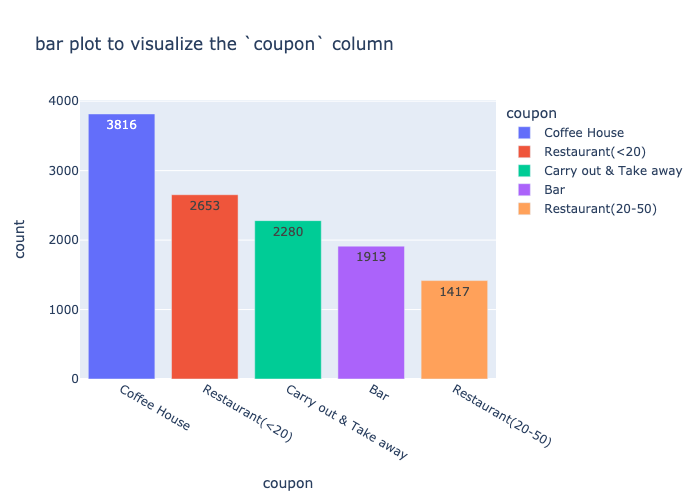

In [45]:
# use plotly and plot the counts of each coupon type 
count = data_c2['coupon'].value_counts()
fig = px.bar(x = count.index, y = count, 
             title = 'bar plot to visualize the `coupon` column', 
             labels = {'x': 'coupon', 
                       'y': 'count',
                       'color': 'coupon'},
             text_auto = True,
             color = count.index
            )
fig.show("png")

6. Use a histogram to visualize the temperature column.

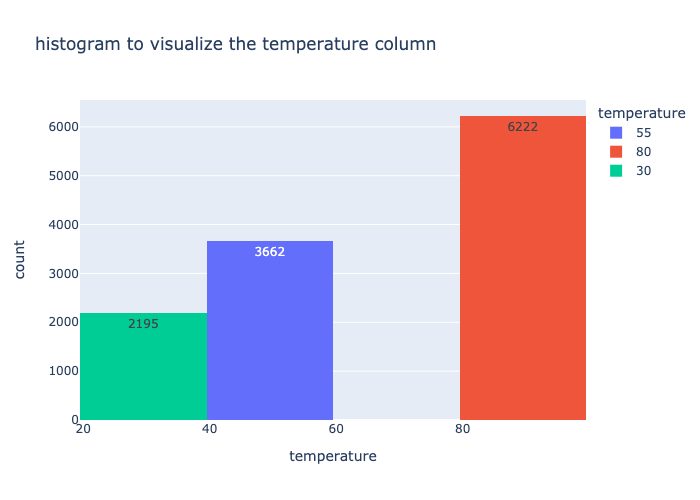

In [46]:
# use plotly to plot the frequency/count of observations in each temperature bin
fig = px.histogram(data_frame = data_c2,
       x = 'temperature',
       color = 'temperature',
       title = 'histogram to visualize the temperature column',
       text_auto = True
       )
fig.show("png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [47]:
# filter for just obersvations with bar coupon
bar = data_c2.query("coupon == 'Bar'")
bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0


In [48]:
# see how many rows (and columns) remain
bar.shape

(1913, 25)

2. What proportion of bar coupons were accepted?


In [49]:
# divide the bar coupon observations that accepted by all bar coupon observations
proportion_bar = bar['Y'].sum() / bar.shape[0]
print('proportion accepted:', proportion_bar*100, '%')

proportion accepted: 41.19184526921067 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [50]:
# create lists to define the groups we want acceptance rates for
lessthaneq3 = ['never', 'less1', '1~3']
morethan3 = ['4~8', 'gt8']

# using the mean of Y column to calculate acceptance rate
lessthaneq3_ar = bar.query("Bar in @lessthaneq3")[['Y']].mean().values[0]
morethan3_ar = bar.query("Bar in @morethan3")[['Y']].mean().values[0]

# show the rates
print("3 or fewer times:", lessthaneq3_ar)
print("More than 3 times:", morethan3_ar)

3 or fewer times: 0.37267441860465117
More than 3 times: 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [51]:
# recall the unique values in age column
bar['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [52]:
# create lists to define the groups we want acceptance rates for
barmorethan1 = ['1~3', '4~8', 'gt8']
ageunder25 = ['below21', '21']

# using the mean of Y column to calculate acceptance rate and show the result
print("more than once a month and are over the age of 25:",
      bar.query("Bar in @barmorethan1 and age not in @ageunder25")[['Y']].mean().values[0]
)
print("all others:",
      bar.query("Bar not in @barmorethan1 or age in @ageunder25")[['Y']].mean().values[0]
)

more than once a month and are over the age of 25: 0.6898263027295285
all others: 0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [53]:
# recall the unique values in passanger and occupation columns
print(bar['passanger'].unique())
print(bar['occupation'].unique())

['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']


In [54]:
# create lists to define the groups we want acceptance rates for
kidoralone = ['Kid(s)', 'Alone']
fff = ['Farming Fishing & Forestry']


# using the mean of Y column to calculate acceptance rate and show the result
print("bars more than once, non-kid passengers, non-farming/fishing/forestry occupation:",
      bar.query("Bar in @barmorethan1 and passanger not in @kidoralone and occupation not in @fff")[['Y']].mean().values[0]
)
print("all others:",
      bar.query("Bar not in @barmorethan1 or passanger in @kidoralone or occupation in @fff")[['Y']].mean().values[0]
)


bars more than once, non-kid passengers, non-farming/fishing/forestry occupation: 0.7142857142857143
all others: 0.37877030162412995


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [55]:
# recall the unique values for widow, cheap restaurant, and income columns
print(bar['maritalStatus'].unique())
print(bar['RestaurantLessThan20'].unique())
print(bar['income'].unique())

['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' 'never']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [56]:
# create lists to define the groups we want acceptance rates for
ageunder30 = ['below21', '21', '26']
cheapmorethan4 = ['4~8', 'gt8']
incomeless50K = ['$37500 - $49999', '$25000 - $37499', 'Less than $12500']

In [57]:
# using the mean of Y column to calculate acceptance rate and show the result
# group A/B/C are shorthand for the three groups posed in the question
print('Group A:', 
      bar.query('Bar in @barmorethan1 and passanger not in @kidoralone and  maritalStatus != "Widowed"')[['Y']].mean().values[0]
)
print('Group B:', 
      bar.query('Bar in @barmorethan1 and age in @ageunder30')[['Y']].mean().values[0]
)
print('Group C:', 
      bar.query('RestaurantLessThan20 in @cheapmorethan4 and income in @incomeless50K')[['Y']].mean().values[0]
)

Group A: 0.7142857142857143
Group B: 0.7195121951219512
Group C: 0.46835443037974683


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, the hypothesis is that the following types of drivers are more likely to accept bar coupons. In the vernacular of the questions above posed, these are drivers who either:
- go to bars more than 3 times a month (76%)
- go to bars more than once a month and are over the age of 25 (69%)
- go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry (71%)
- go to bars more than once a month, had passengers that were not a kid, and were not widowed (71%)
- go to bars more than once a month and are under the age of 30 (72%)

Or in plain english, any driver who goes to bars at least three times a month can be counted on to be more likely to accept the bar coupon. Otherwise, those who go at least once a month won't necessarily accept the bar coupon unless they fit further characteristics including: 

a) are of legal drinking age, 

b) are riding with a friend and not working in an industry that operates heavy machinery, 

c) are riding with a buddy or significant other that's still alive,

d) are living the bachelor life while under the age of 30

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Data Exploration

To understand which coupon group to look at first, we'll revisit the coupon categories

In [58]:
data_c2['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

And also see how many sample observations exist under each to ensure there are enough data points

In [59]:
data_c2['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

Since all coupon categories appear usable with sufficient samples, before deciding, let's take a look at what the acceptance rate is like across the board.

#### Showing acceptance rate across coupon types

From the bar graph we see coupons for cheap restaurants (ie. Restaurant (<20)) and Carry out & Take away pretty much push themselves (almost 3 out of 4 drivers will accept). 

We can speculate that is likely due to the drive through or pick-up friendly restuaruant chains in these cateogries. These low cost, low time commitment options likely lend themselves to be easier for drivers to carve out time and budget for when presented with a coupon.

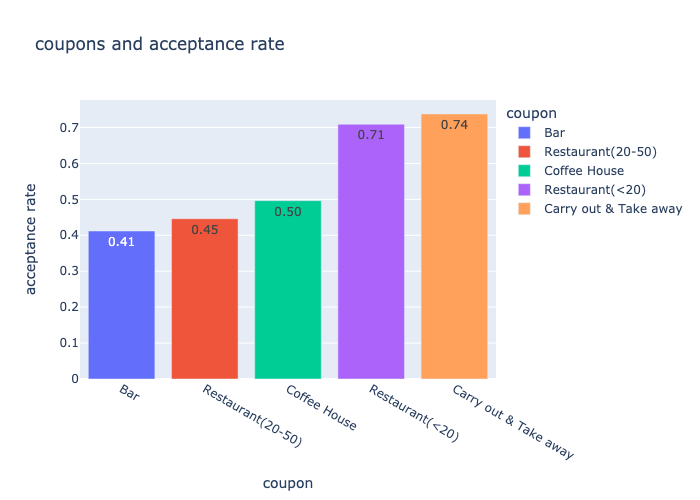

In [60]:
# take the mean of each coupon type (which yields acceptance rate), 
# sort the values from smallest to largest and reset the index so that 
# the dataframe can be used in a plotly bar plot

df = data_c2.groupby('coupon')[['Y']].mean().sort_values(by = 'Y').reset_index()
fig = px.bar(data_frame = df, x = 'coupon', y = 'Y', color = 'coupon',
             text_auto = '.2f', title = 'coupons and acceptance rate', 
             labels = {'Y': 'acceptance rate'})
fig.show('png')


#### Decision: Explore Restaurants (20-50) coupon group

This motivates us to focus on the remaining categories that are harder to push (other than bar coupons) and explore the differences in those who accept and reject the coupon.

Since more expensive restaurants (ie. Restaurants (20-50)) has the second lowest acceptance rate, we will focus on cracking this tougher nut with some slicing and dicing below.

The intention will be to identify factors which increase likelihood of drivers accepting this coupon type.

#### Selecting the expensive restaurants data

In [82]:
# filtering for restaurant coupon data only
rest_df = data_c2.query('coupon == "Restaurant(20-50)"')
rest_df.shape

(1417, 25)

#### Look at how many unique values
To efficiently sift through which columns to plot and how, let's see how many unique values are in each column.

In [62]:
rest_df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   1
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

Most values are categorical or at least the number of values are finite. This suggests we can use bar graphs safely across the board to explore. 

#### Keep exploring with bar graphs
Let's quickly analyze each of these columns using bar graphs to see if there are any values that immediately show differences in acceptance rate of coupons. Scroll past the plots to see a summary of findings.

*Note: Please forgive the color choice on the occupation graph, but in interest of time a choice was made not to plot that separately with it's own color sequence. Additionally, some other column categories appear out of order but are determined by their apperance in the data. These will be corrected in subsequent plots that are less exploratory in nature.*

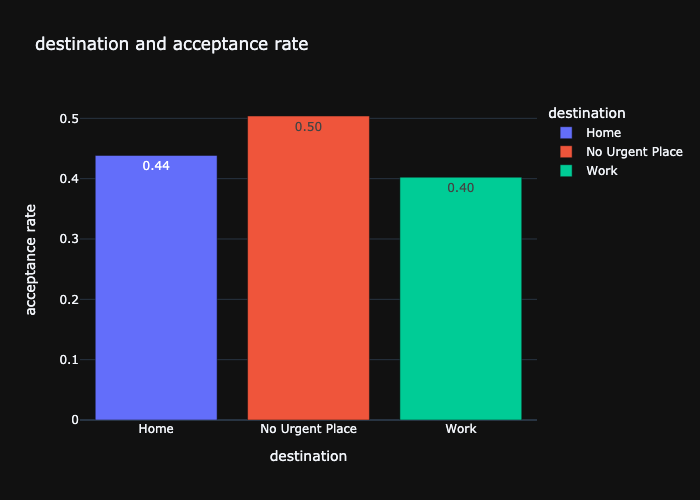

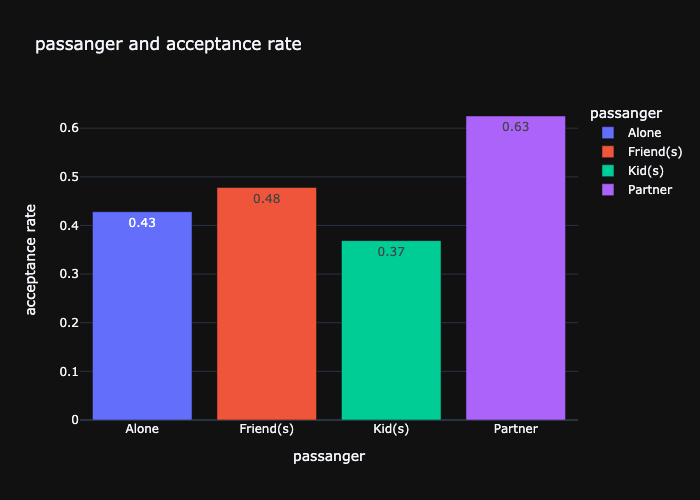

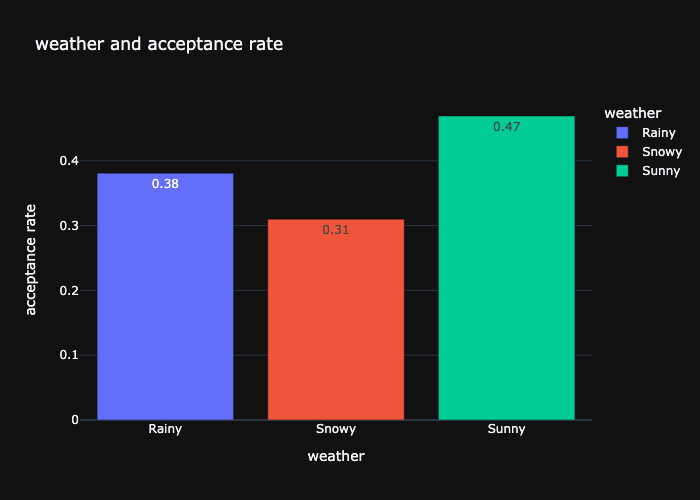

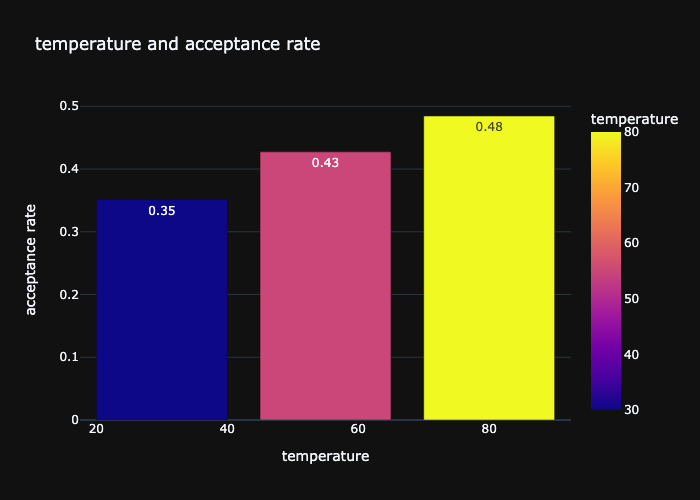

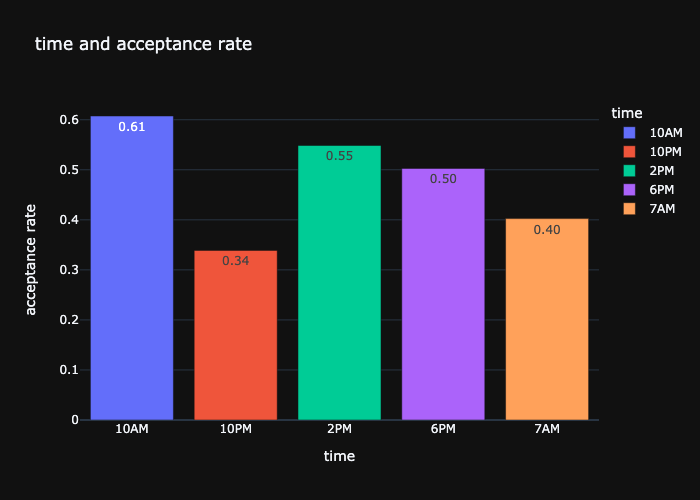

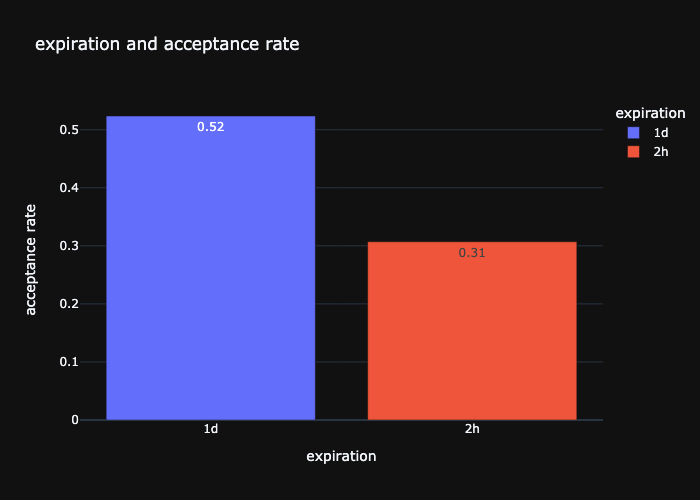

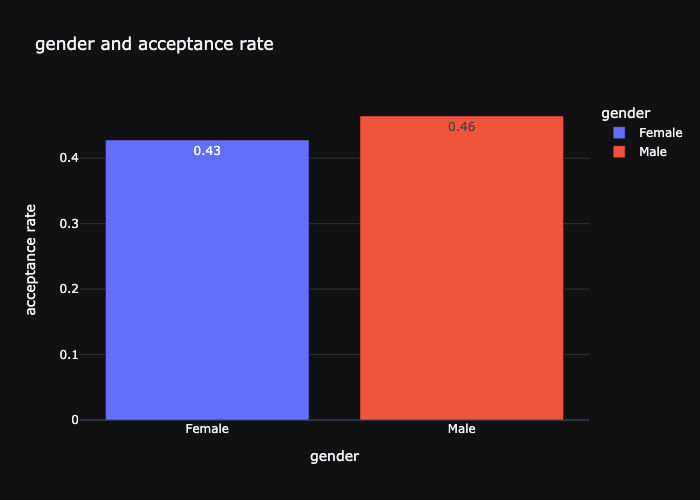

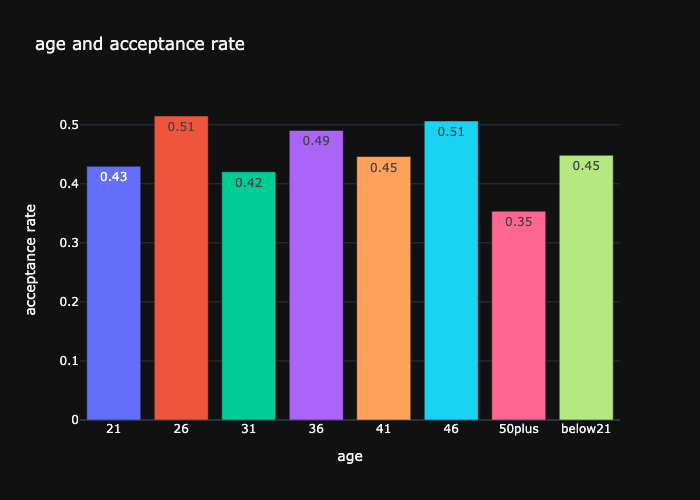

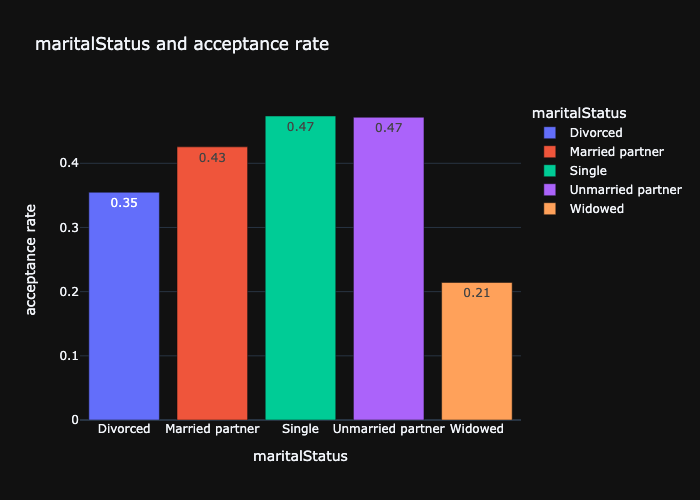

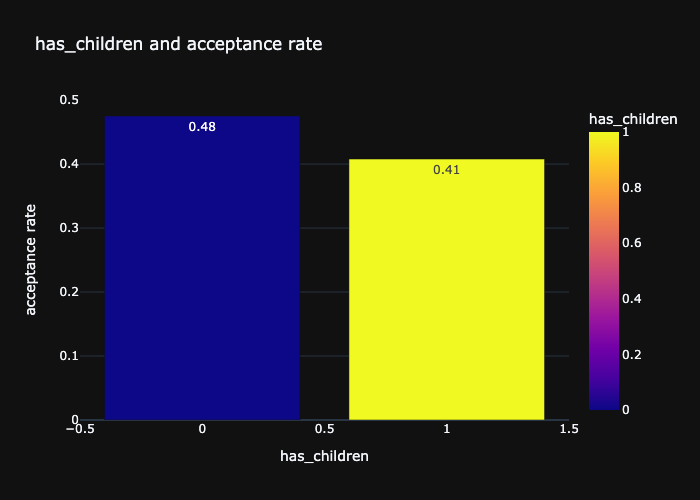

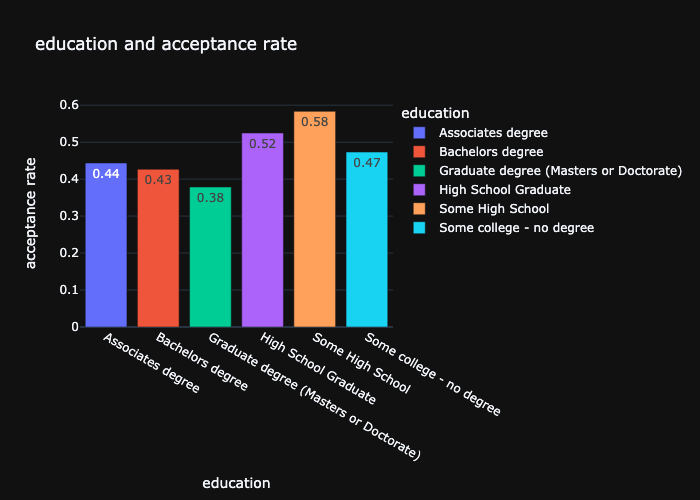

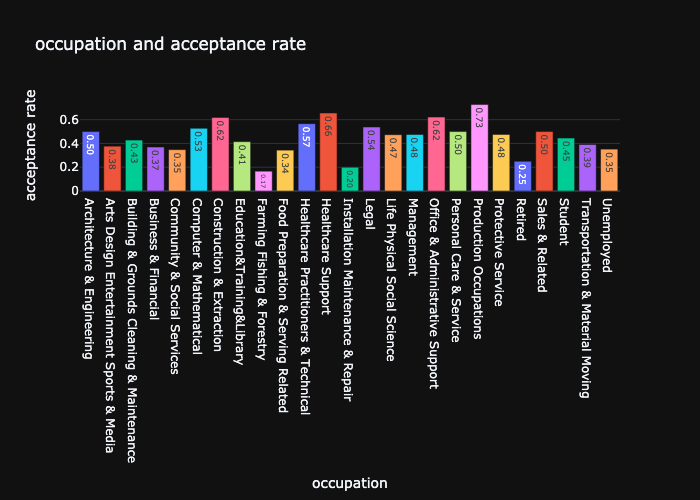

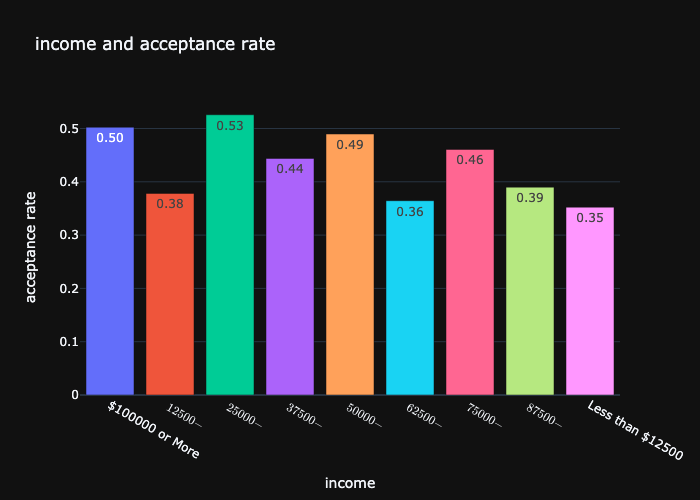

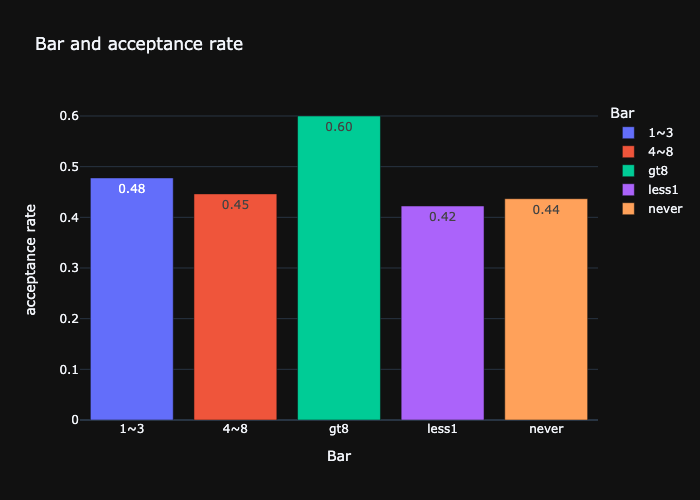

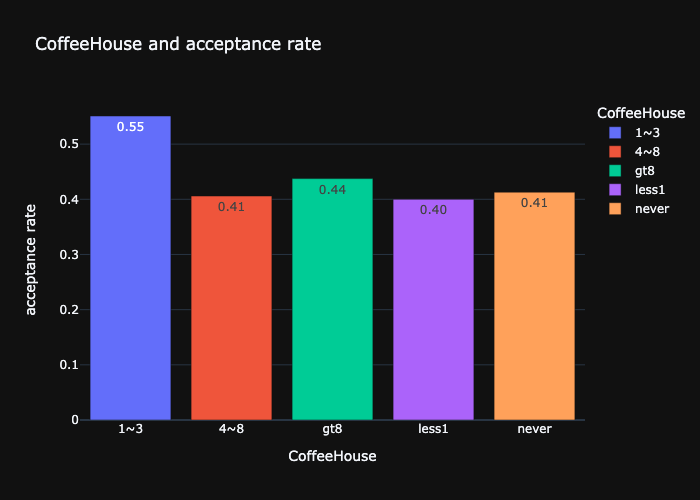

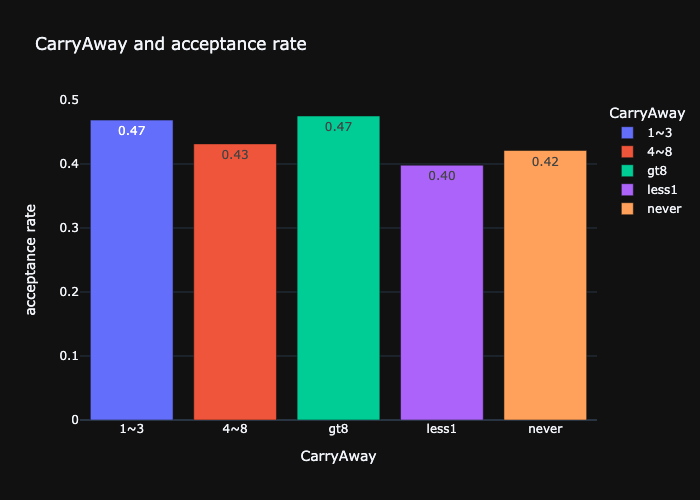

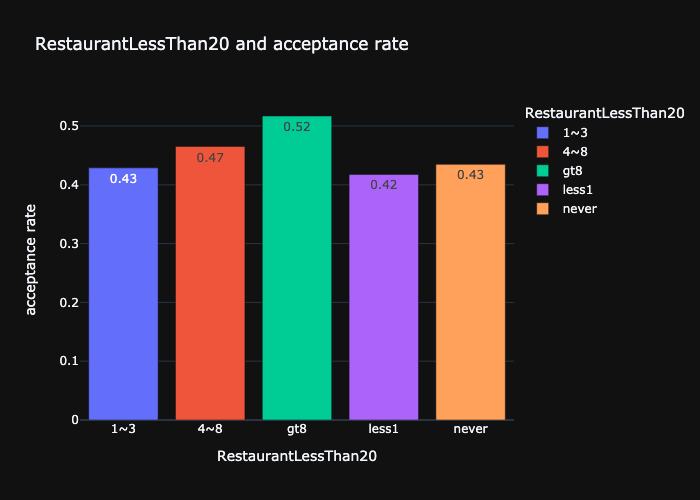

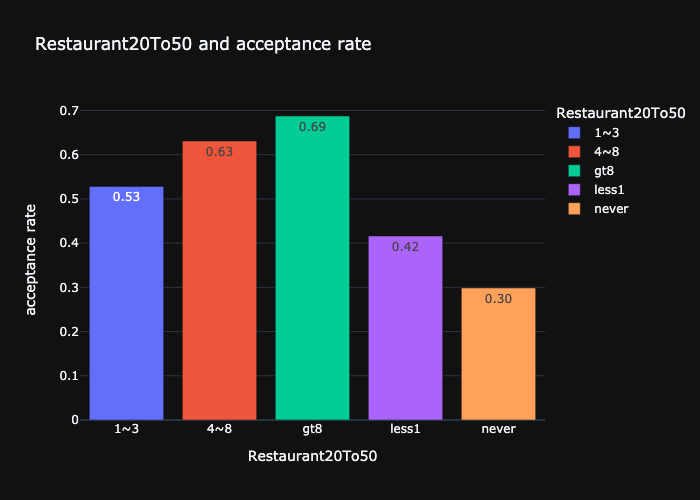

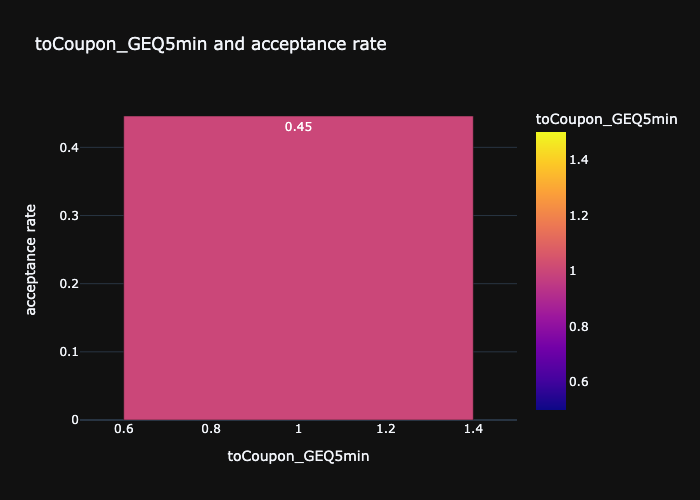

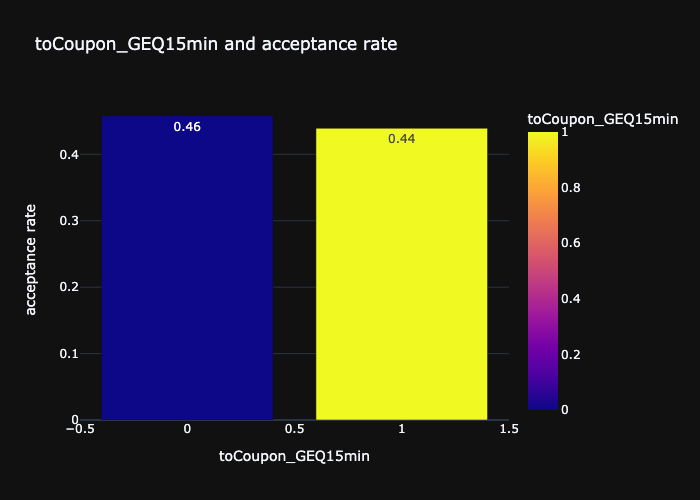

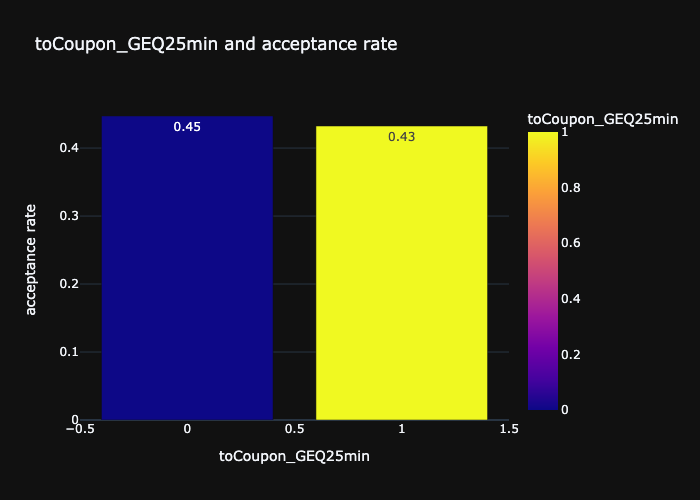

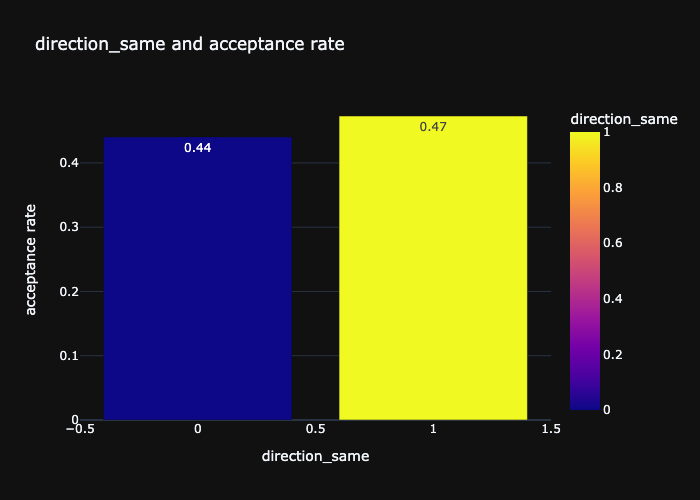

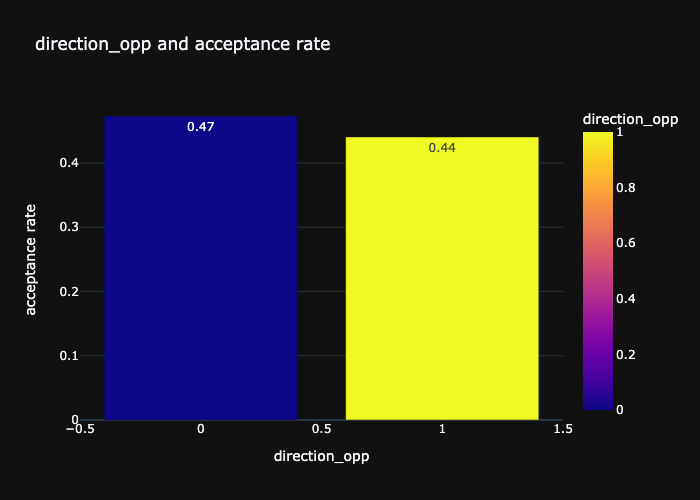

In [79]:
# we loop through the dataframe columns for independent variables we want to plot
# against the mean of column 'Y' to show the coupon acceptance rate
# to calculate this, we will need to groupby and perform aggregation function mean
# before using bar plot in plotly to visualize

# note: 
# we skip over 'Y' and 'coupon' columns
# and also remove the legend for columns with more than six categories to improve
# plotting spacing and readability

for c in rest_df.columns:
    if c not in ['Y', 'coupon']:
        fig = px.bar(data_frame = 
                    rest_df.groupby(c)[['Y']].mean().reset_index(), 
                    x = c, y = 'Y', color = c,
                    text_auto = '.2f', title = c + ' and acceptance rate', 
                    labels = {'Y': 'acceptance rate'},
                    template = 'plotly_dark',
                    #color_discrete_sequence = px.colors.qualitative.Light24
                    )
        if rest_df[c].nunique() > 6:
                fig.update_layout(showlegend=False)
        fig.show('png')

#### Findings from Bar Plots
To keep laser focus through the noise, we make notable observations for where acceptance rate is above the population's acceptance rate of 0.44.

When do we see increases in coupon acceptance? When:

Contextually
- the destination is 'no urgent place' (0.50)
- their 'partner' is the passenger (0.63)
- the weather is sunny it marginally improves to 0.46
    - likewise when temperature is 80F it improves to 0.48
- the time of the coupon is sent at 10 AM (0.60), followed by 2 PM (0.54)
- the coupon expiration is longer at 1 day (0.52)

Demographically
- the driver is male (0.46)
- the driver is between the ages of 26 - 46 (~0.5)
- the marital status is single or unmarried partner (~0.47)
- the driver has no children (0.47)
- their education is a high school graduate or some high school (0.52 to 0.58)
- the occupation is in construction & extraction (0.62), healthcare support (0.66), healthcare practictioner (0.57), office and admin support (0.62), and production occupations (0.73)
- income over 100K (0.50) or between 25 to 50K (0.53)

Behaviourally
- the driver visits bars or restauraunts at least once a month: the more frequent the more likely (ie. as high as 0.69 when going to expensive restaurants more than 8 times)

#### Confirming significance of observations with value counts

We plot additional bar graphs of value counts to understand the data distribution and ensure we have enough data (30 samples or more) to substantiate significance. 

Specifically, per Assistant Research Engineer Garbiel Gomes at UC Berkeley, statisticians have found that 30 is a pretty good general threshold to assume that the distribution of a sample's mean is normal.

Scroll past the plots for a summary of notable findings.

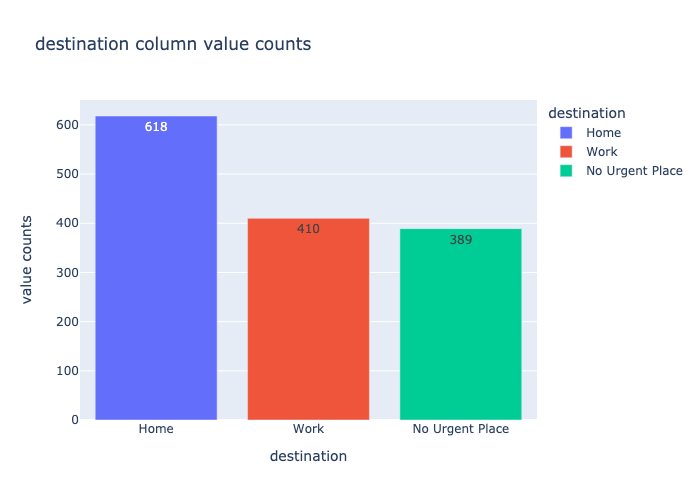

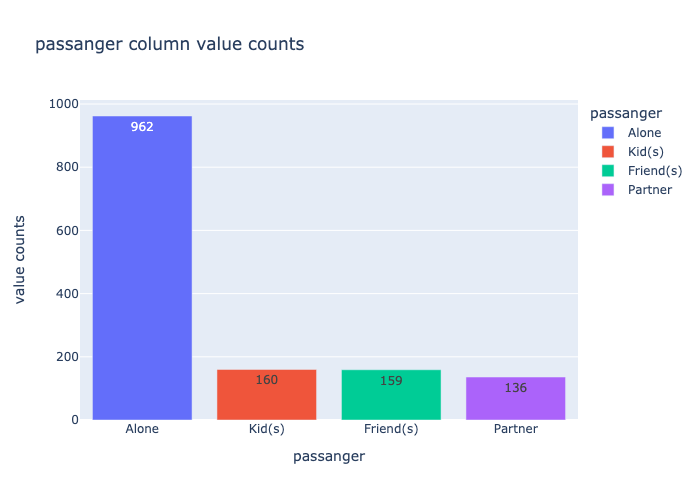

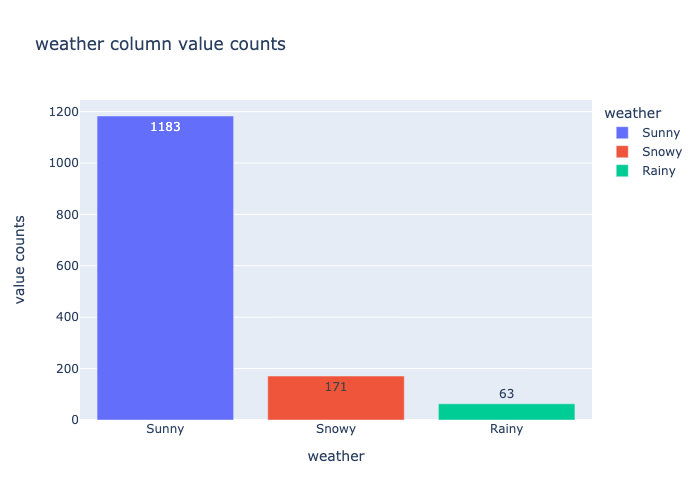

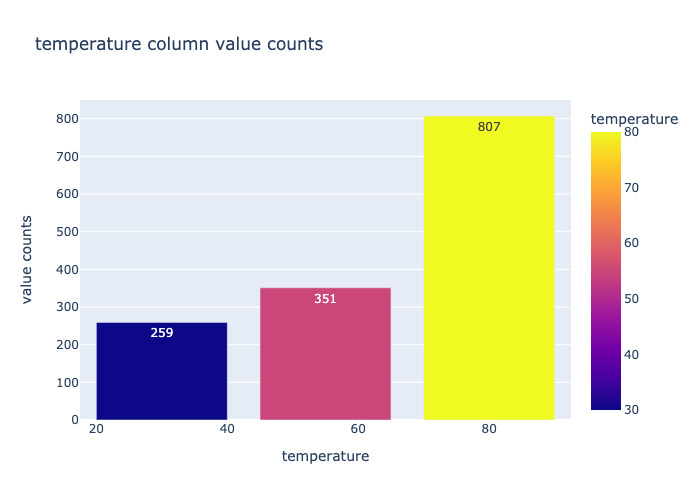

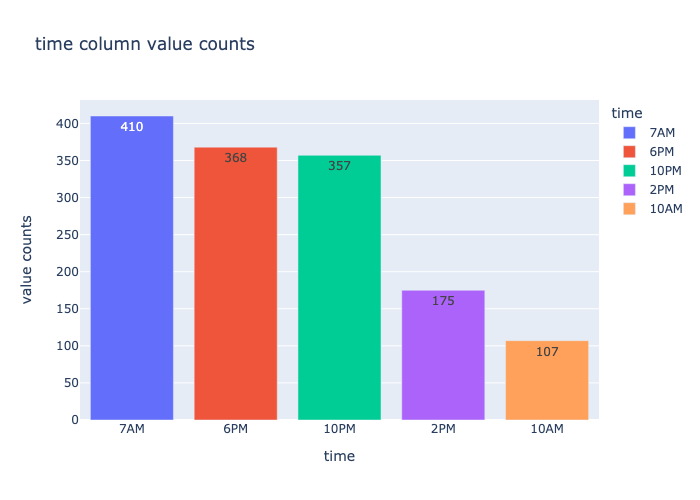

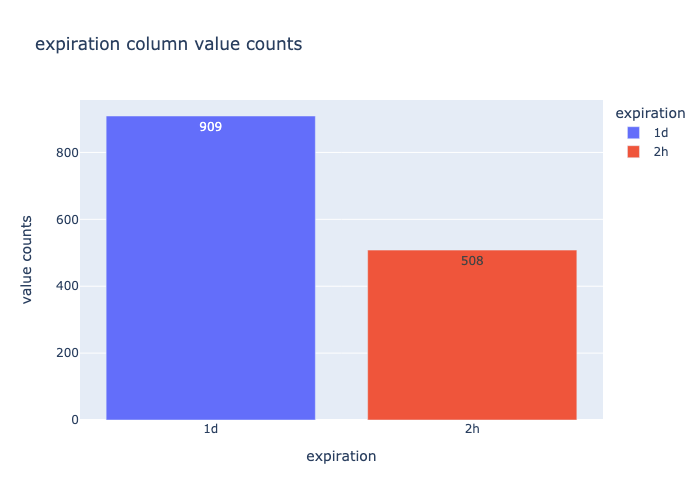

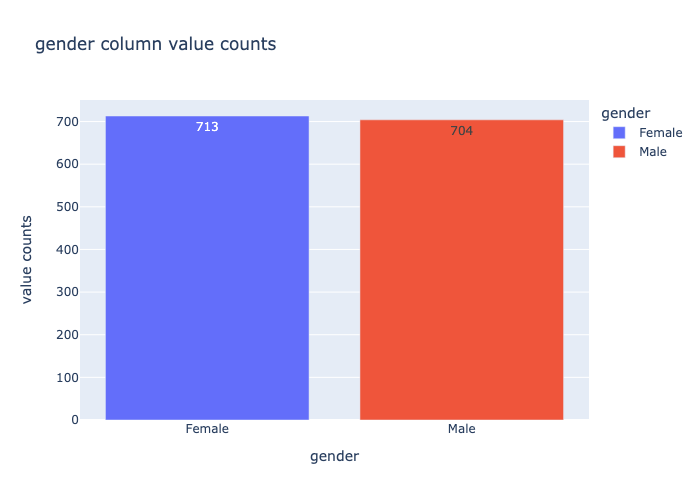

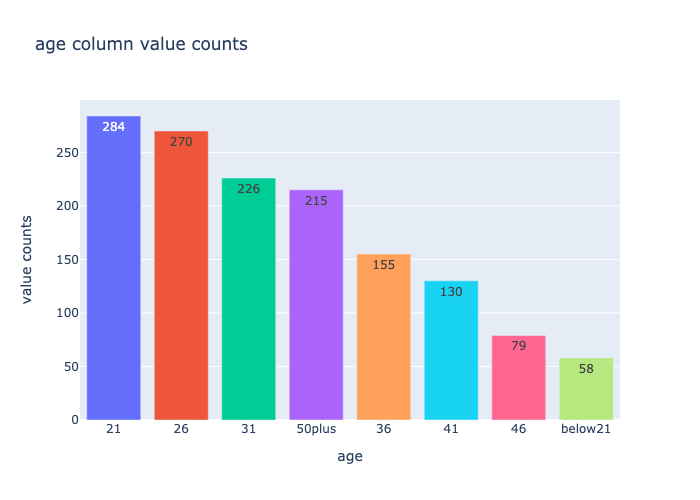

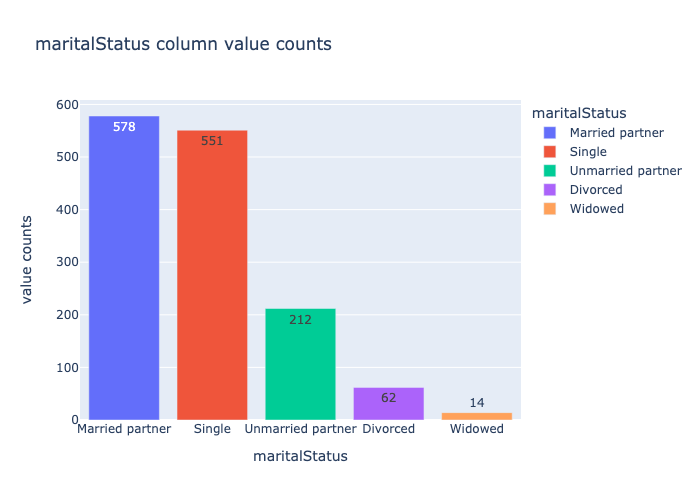

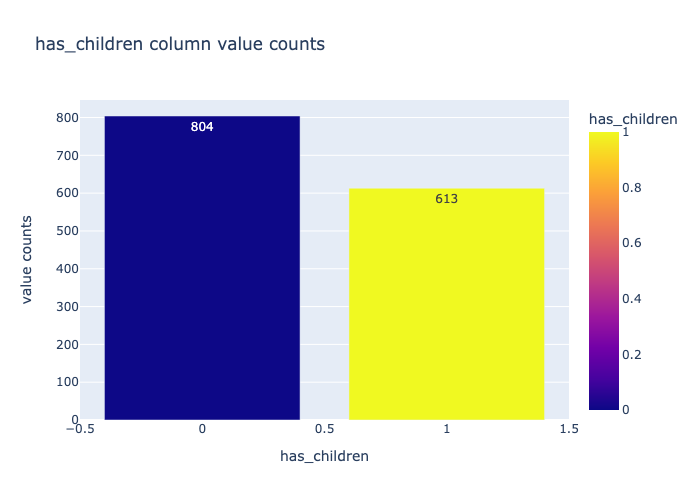

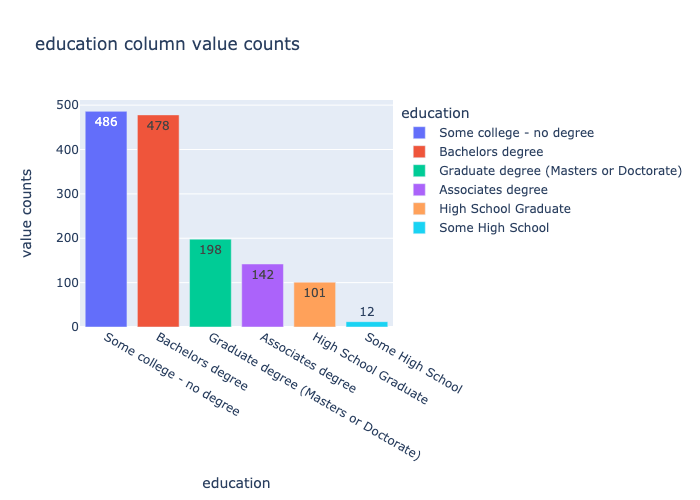

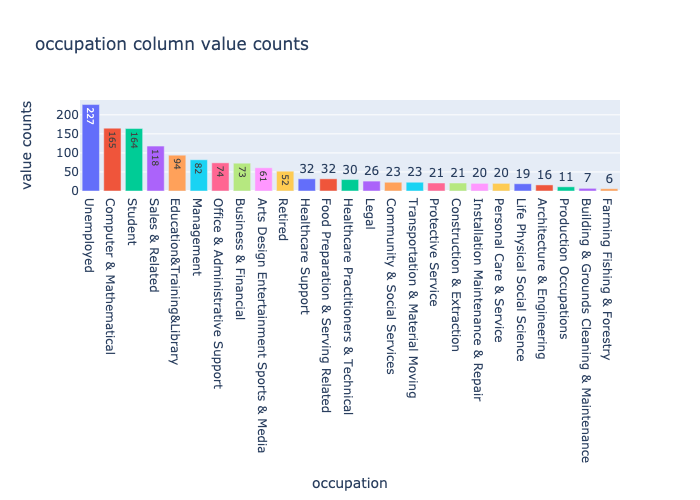

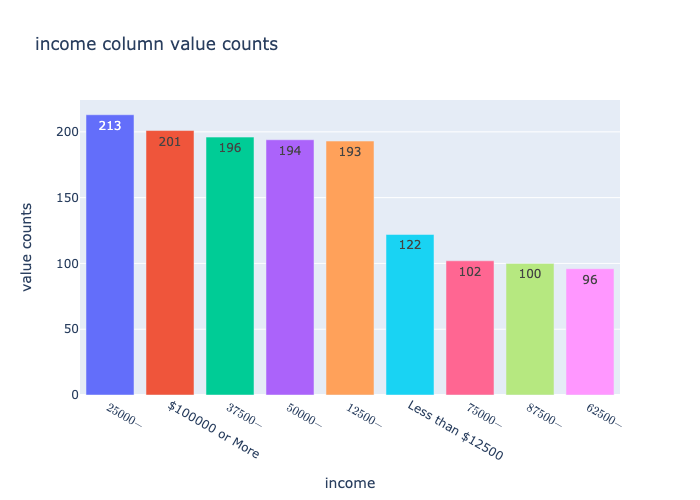

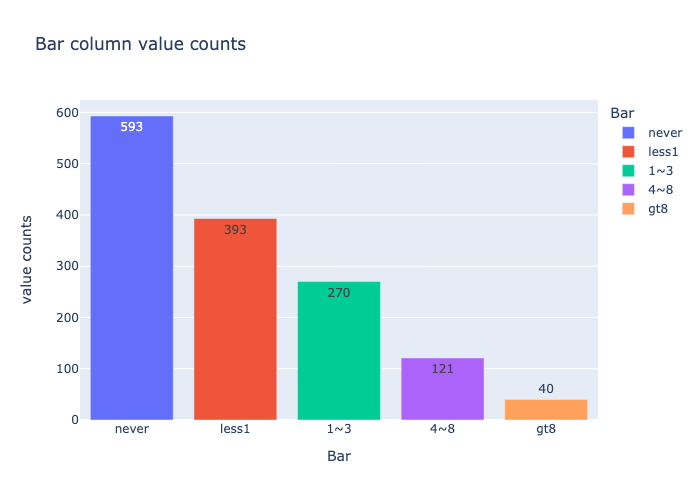

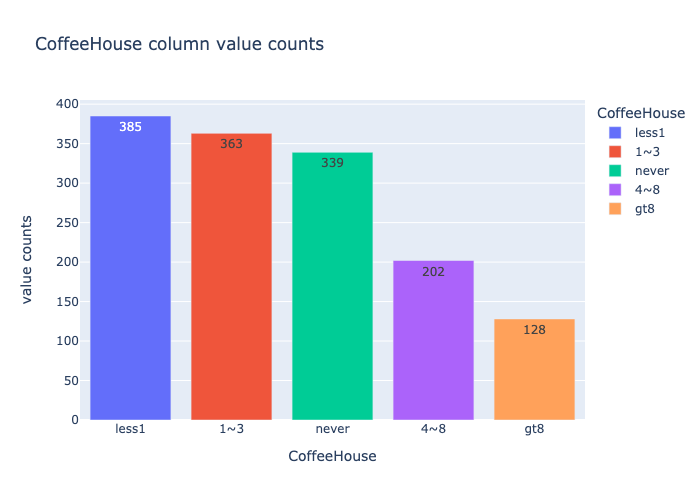

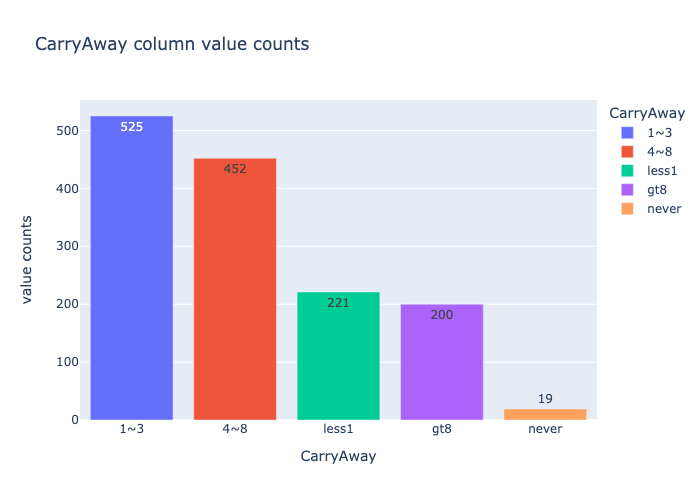

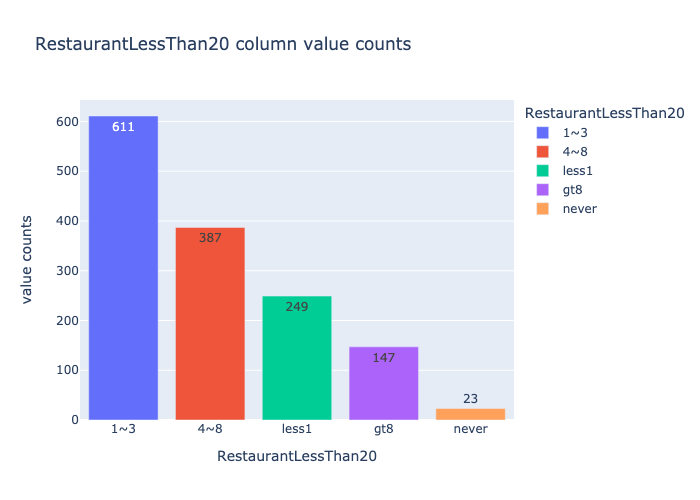

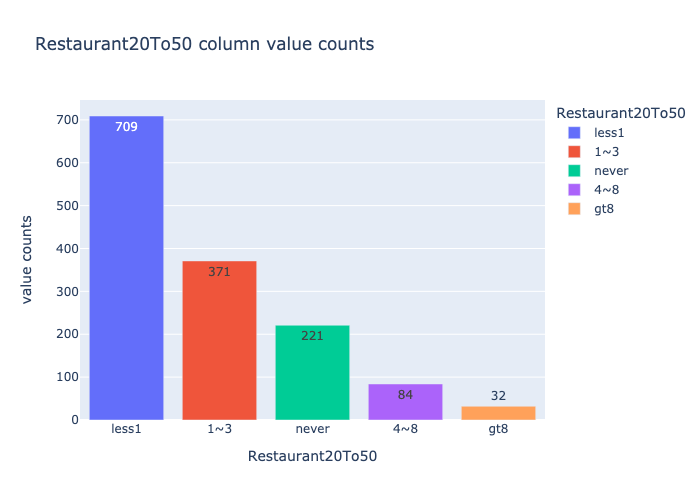

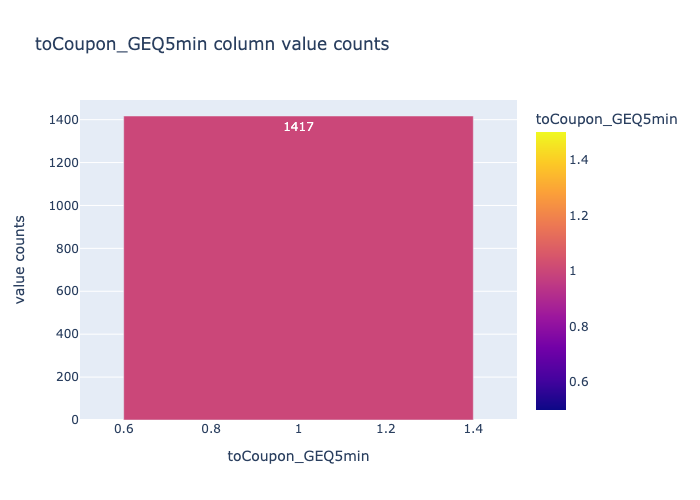

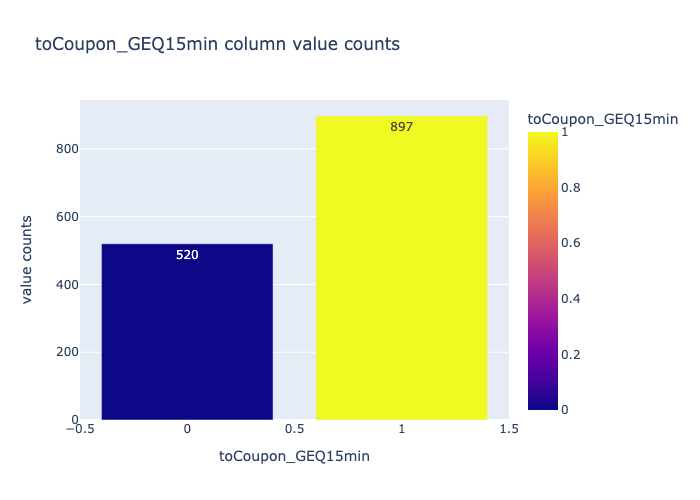

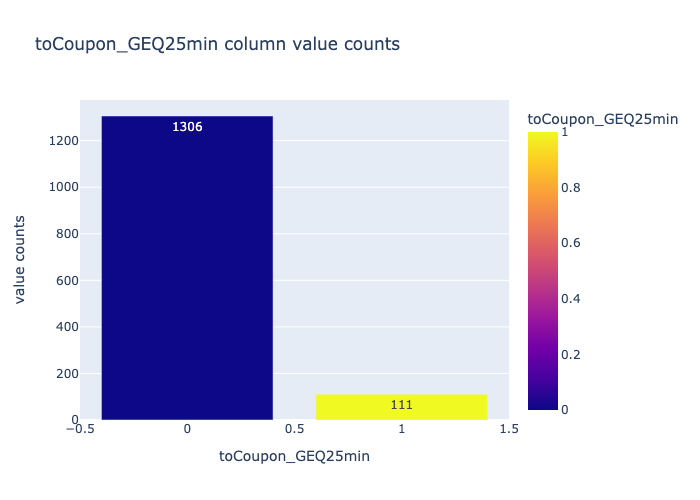

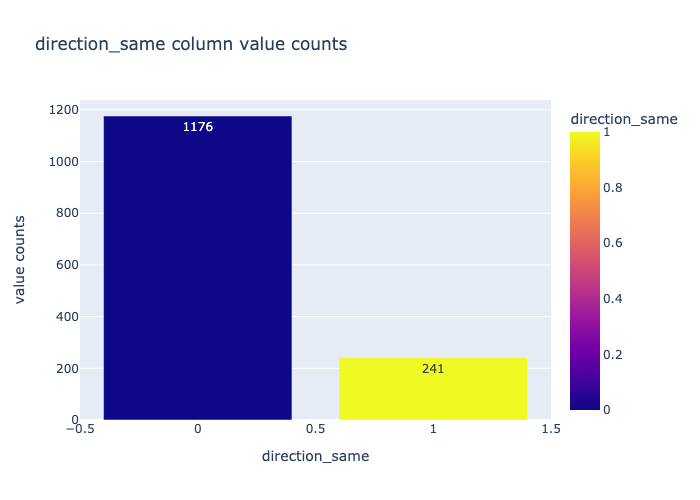

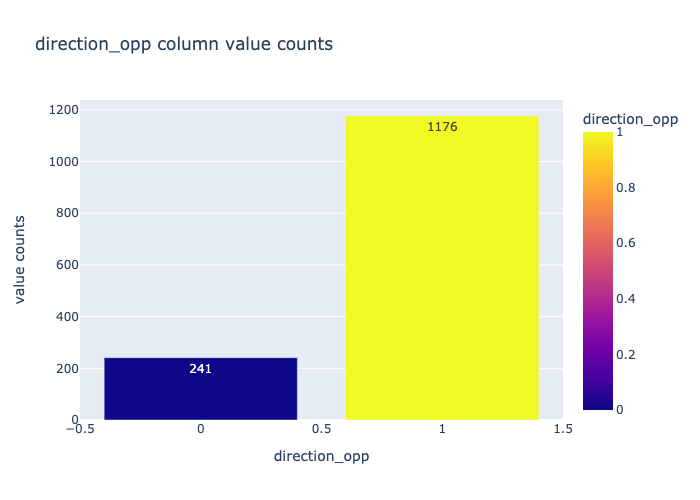

In [81]:
# following similar approach earlier for finding acceptance rates
# we loop through the columns but this time calculate the value counts for
# plotting in plotly bar plot

for c in rest_df.columns:
    if c not in ['Y', 'coupon']:
        fig = px.bar(x = rest_df[c].value_counts().index, 
                     y = rest_df[c].value_counts(), 
                     color = rest_df[c].value_counts().index,
                     text_auto = True, title = c + ' column value counts', 
                     labels = {'y': 'value counts',
                               'x': c,
                               'color': c})
        if rest_df[c].nunique() > 6:
                fig.update_layout(showlegend=False)
        fig.show('png')

#### Potential areas that need more data
Based on the graphs, we can observe the following columns and the particular values that might warrant further data to support any observations made:

With values in the low 10s or less
- Marital status - widowed
- Education - some high school
- Occupation - 1/3 of the values

With values in the low 20s but we'll accept for now
 - In columns related to frequenting bars/restaurants - never

#### Can we do more to find differences in acceptance rate?

While we can conduct multivarite analysis to further investigate, we need to apply findings from the univariate analysis earlier to inform our choice of hypotheses that can likely yield meaningful findings. This should mitigate an otherwise unwieldly amount of plotting for all possibilities.

In this process we will use density heatmaps to show the acceptance rate in relation to two variables at a time. If appropriate we will add a third variable as a facet row or column to investigate further.

#### First we define some helper functions to plot

In [83]:
# defining a function to quickly plot two variables of interest
# given a dataframe, the first variable, second variable, and the dependent variable
# which will always be 'Y'

def plotxy(df, colx, coly, z):
        fig = px.density_heatmap(data_frame = df,
                                x = colx, y = coly,
                                z = z, histfunc = 'avg',
                                text_auto = '.2f',
                                labels = {z: 'accepted'},
                                template = 'plotly_dark',
                                title = 'how ' + colx + ' and ' + coly + ' affect acceptance rate')
        fig.show('png')

# defining another function to quickly plot two variables of interest as above 
# but with an additional column of data for faceting
# and choosing between 'count' and 'avg' as needed for the heatmap calculations

def plotxyfacet(df, colx, coly, facet, z, func):
        fig = px.density_heatmap(data_frame = df,
                                x = colx, y = coly, facet_col = facet,
                                z = z, histfunc = func,
                                text_auto = '.2f',
                                labels = {z: 'accepted'},
                                template = 'plotly_dark',
                                title = 'how ' + colx + ', ' + coly + ' and ' + facet + ' affect acceptance rate')
        fig.show('png')



#### Reminder of what columns exist we want to investigate together

In [67]:
rest_df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

#### Paring down which columns to investigate
We will pass on looking at occupation as we know drivers of three different occupation types already tend to take up the coupon more than 60-70% of the time.

Based on acceptance rate observations previously in our univariate analyses, we choose the following columns to keep investigating further and discard the rest:

Keepers
- destination, passanger, weather, are promising
- timing, expriration, age, income may yield further findings
- maritalStatus, haschildren, education

Reductionists
- restaurant, bar, coffeehouse, carryaway all appear likely correlated somewhat, we will use keep the expensive restaurant as it is most relevant
- direction_same and direction_opp are inverses, we will keep only one of them

Skippers
- we will pass on temperature as it likely correlates to weather
- no significant difference for gender, so we will pass on this
- skip the toCoupon columns given insigniciant differences

#### Still too many columns to investigate...
If we think of it another way - ideally after finding the coupon acceptance differences, we would want there to still be a large bucket of drivers to target who we know have a high acceptance rate. Perhaps a further refined approach would be to first choose variables that don't slice our groups too small. 

#### Investigate the columns with up to three variables first

In [84]:
# these are our columns of interest as explained above
interest = ['destination', 'passanger', 'weather', 'time', 
            'expiration', 'age', 'maritalStatus', 'has_children',
            'education', 'income', 'Restaurant20To50', 'direction_same']

# further to this we will get the unique value counts for each column in the dataframe
# so that we can further pare down our columns of interest
# to only columns with three categories or fewer

unique = rest_df.nunique() 
unique_short = unique[unique <= 3] # get only the columns with less than certain amount of values
interest_short = [c for c in unique_short.index if c in interest] # cross match with our columns of interest
print(interest_short)


['destination', 'weather', 'expiration', 'has_children', 'direction_same']


#### Five columns gives us something manageable to work with
We will define a function to help us iterate through the columns and produce the heatmaps

direction_same vs others


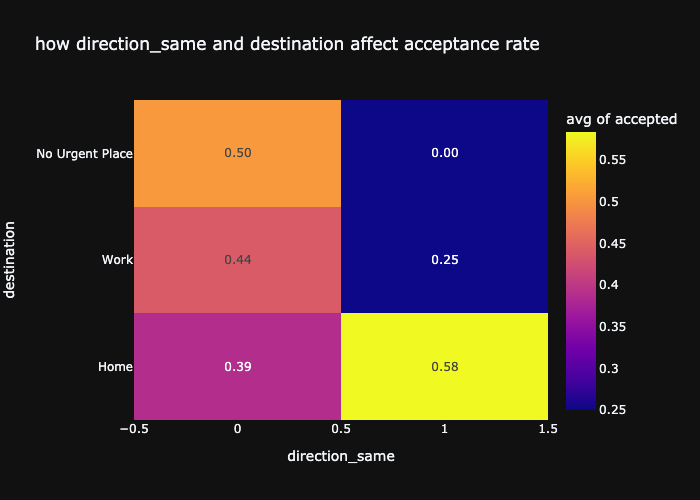

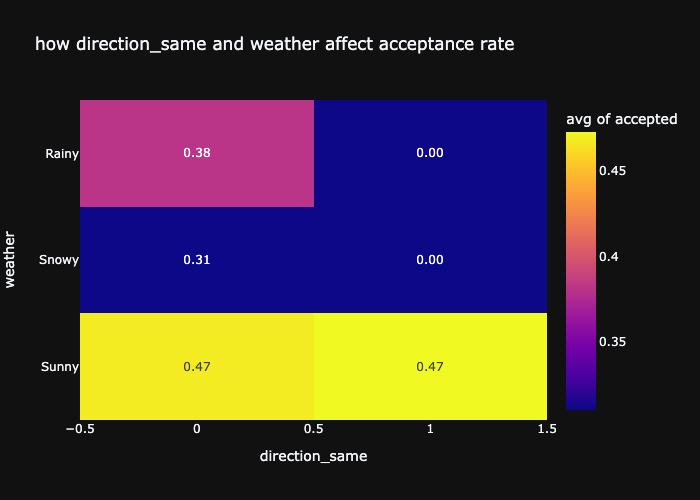

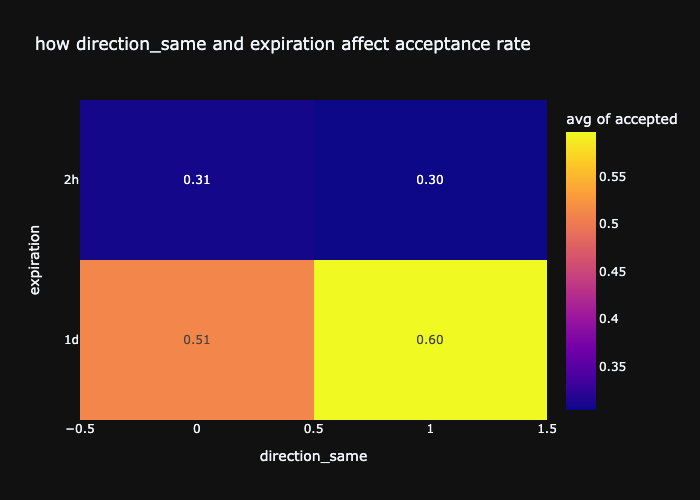

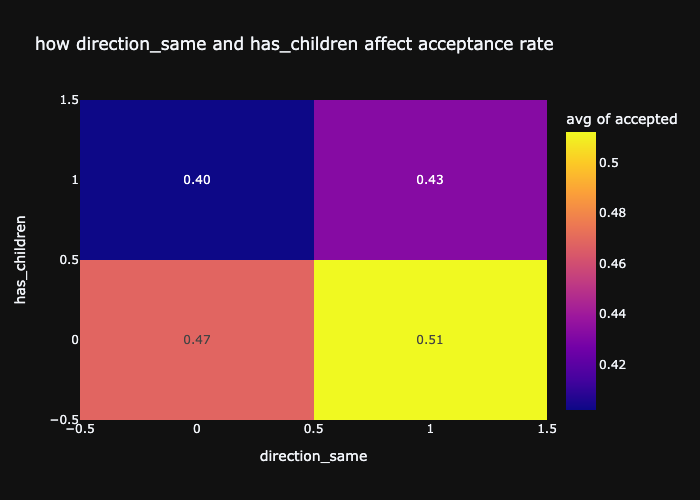

has_children vs others


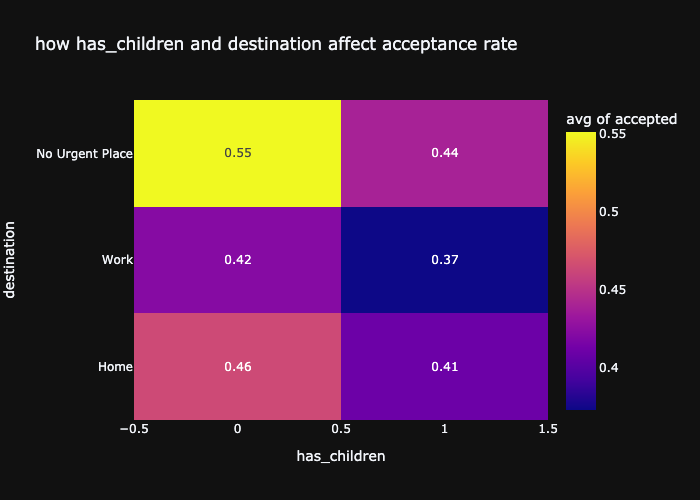

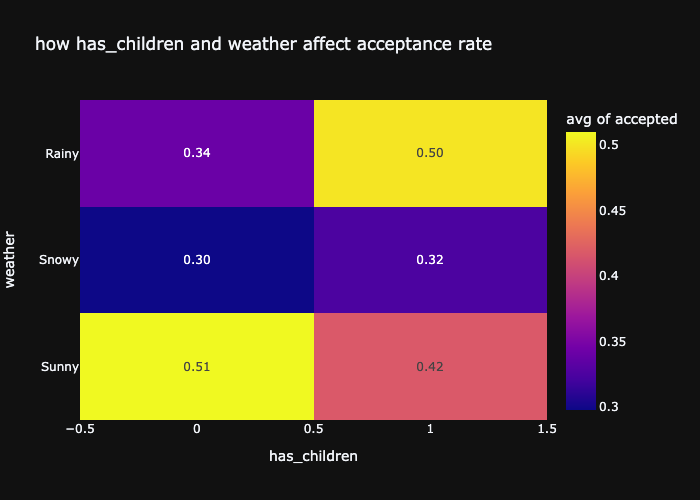

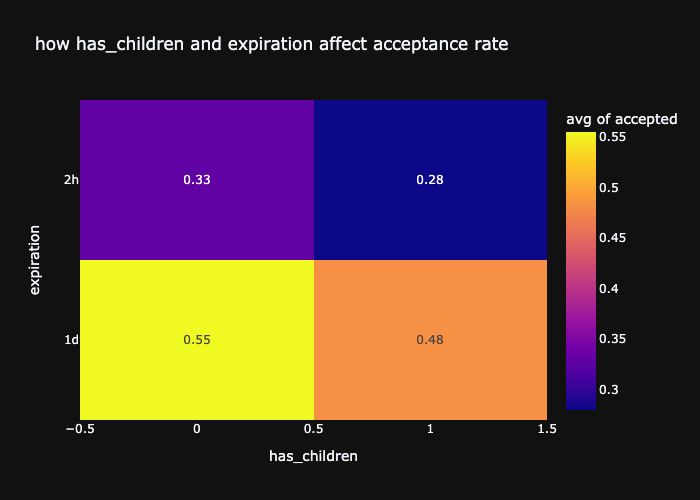

expiration vs others


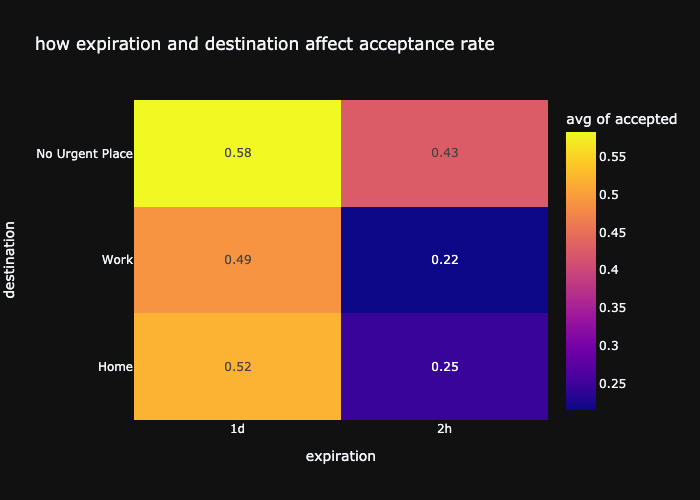

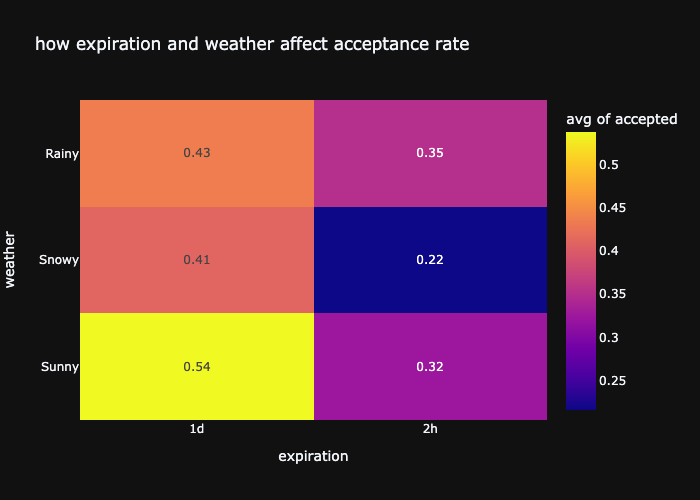

In [69]:
# create a helper function taking in dataframe, the list of columns to plot, and the 
# column 'Y' that we want to aggregate the mean for

# we will iterate until  all pairwise combinations are plotted 
# when the list of columns is down to 2 columns only, we are done
# we will pop each column name and iterate through plots of it against all other
# remaining columns in the list

def plot_interest_2d(df, clist, z):
    while len(clist) > 2:
        colx = clist.pop()
        print(colx + ' vs others')
        for coly in clist:
            plotxy(df, colx, coly, z)

plot_interest_2d(rest_df, interest_short, 'Y')

#### A letdown of a first pass?
Unfortunately there were no significant findings of note other than confirmation of the univaraite findings we already noted before.

#### Change our approach
To improve upon our previous approach, we try to be guided by heuristics and common logic. We will develop informed hypotheses that determine our heatmap plotting variables. Further we will update our goal - we will look for any observations that have over **.70 acceptance rate** (ie. the highest from the occupation column observed thus far).

#### First multi-variate hypothesis
1) If a driver has more disposable income and frequents expensive restaurants, that would likely produce a higher likelihood to accept the coupon?


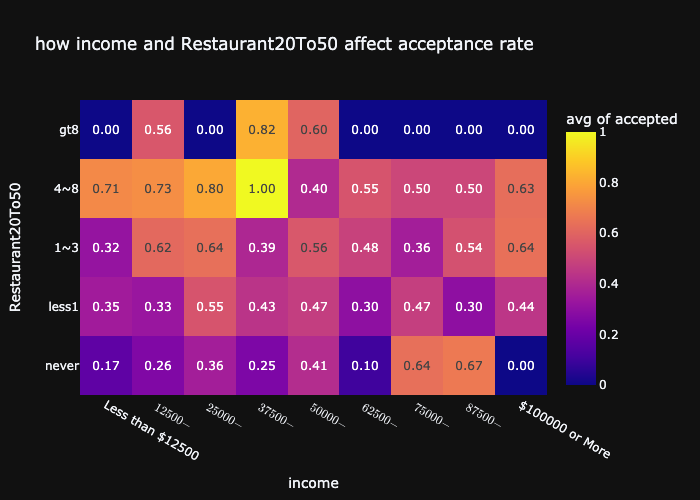

In [85]:
### plot the heatmap but this time update the x and y axes to ensure the categories are 
### ordered logically, and not in the order they appear in the data

colx = 'income'
coly = 'Restaurant20To50'
z = 'Y'

fig = px.density_heatmap(data_frame = rest_df,
                        x = colx, y = coly,
                        z = z, histfunc = 'avg',
                        text_auto = '.2f',
                        labels = {z: 'accepted'},
                        template = 'plotly_dark',
                        title = 'how ' + colx + ' and ' + coly + ' affect acceptance rate',
                        )
fig.update_xaxes(categoryorder='array', categoryarray= ['Less than $12500',
                            '$12500 - $24999',
                            '$25000 - $37499',
                            '$37500 - $49999',
                            '$50000 - $62499',
                            '$62500 - $74999', 
                            '$75000 - $87499',
                            '$87500 - $99999',
                            '$100000 or More' ]
                 )
fig.update_yaxes(categoryorder='array', categoryarray= 
                 ['never', 'less1', '1~3', '4~8', 'gt8']
                 )
fig.show('png')



#### Heatmap Findings: First bingo!

Looking at the top left quadrant tells us that lower income drivers (under 50K) who go to restauraunts in the 20 to 50 range more than four times a month, have a very high likelihood to accept the coupon (between 0.71 to 0.82)! 

A surprising twist to our initial hypothesis, perhaps rich people are less enticed by coupons given the relative savings of a coupon is less signifcant?

#### Second multi-variate hypothesis
2) If a drivr receives the coupon right before a regular mealtime, and if the coupon expires faster or slower, would either case encourage higher coupon acceptance? We already know 10 AM is the best time for acceptance at 0.60, could expiration time further change this?

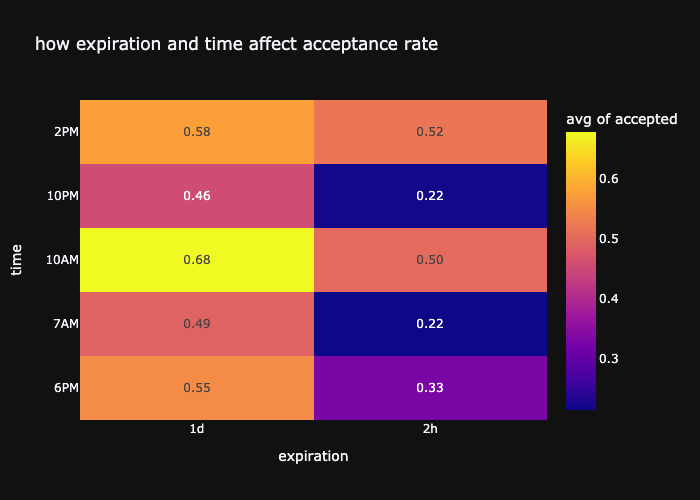

In [86]:
### plot the heatmap with expiration and time columns

colx = 'expiration'
coly = 'time'
z = 'Y'

fig = px.density_heatmap(data_frame = rest_df,
                        x = colx, y = coly,
                        z = z, histfunc = 'avg',
                        text_auto = '.2f',
                        labels = {z: 'accepted'},
                        template = 'plotly_dark',
                        title = 'how ' + colx + ' and ' + coly + ' affect acceptance rate',
                        )
fig.show('png')

#### Heatmap Findings: Expiration does play some role
While acceptance rate does increase when a coupon is sent at 10 AM and has a longer expiration (a day), 0.68 just nearly misses our goal to find observations above 0.70.

#### Third and final multi-variate hypothesis
3) We know passenger type already plays a role, does the time of the day when the coupon is sent change the acceptance rate?

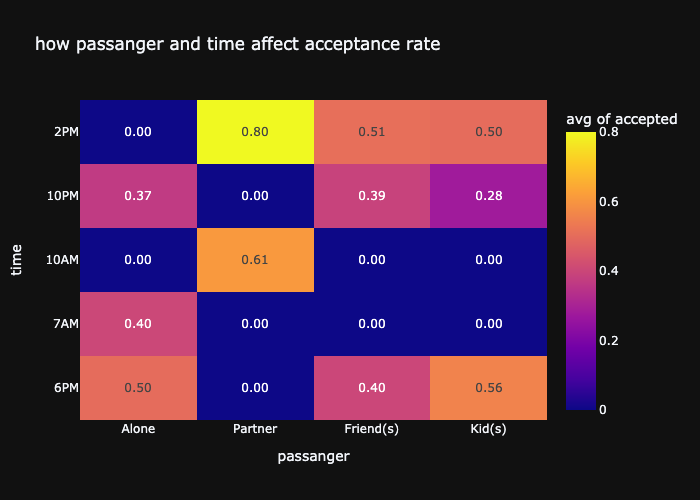

In [87]:
### plot the heatmap with passanger and time columns

colx = 'passanger'
coly = 'time'
z = 'Y'

fig = px.density_heatmap(data_frame = rest_df,
                        x = colx, y = coly,
                        z = z, histfunc = 'avg',
                        text_auto = '.2f',
                        labels = {z: 'accepted'},
                        template = 'plotly_dark',
                        title = 'how ' + colx + ' and ' + coly + ' affect acceptance rate',
                        )
fig.show('png')


#### Heatmap Findings:  Second bingo!
Bingo and another one in the bag! This time we find a whopping 0.80 acceptance rate when driving with a partner and the coupon is recieved at 2PM.

#### A third variable? 
As a last exercise to see if we can beef up our earlier jackpot, we will introduce
one more factor to our first multi-variate hypothesis to see if we can observe further acceptance rate changes.

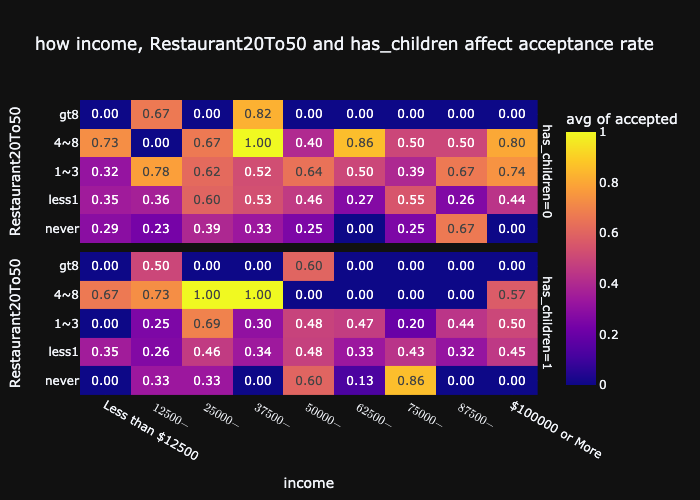

In [89]:
### plot the heatmap with income and time columns, additionally with has_children as a facet row
### again we will update x and y axes for proper order of categories

colx = 'income'
coly = 'Restaurant20To50'
facet = 'has_children'
z = 'Y'

fig = px.density_heatmap(data_frame = rest_df,
                        x = colx, y = coly,
                        z = z, histfunc = 'avg',
                        facet_row = facet,
                        text_auto = '.2f',
                        labels = {z: 'accepted'},
                        template = 'plotly_dark',
                        title = 'how ' + colx + ', ' + coly + ' and ' + facet + ' affect acceptance rate'
                        )
fig.update_xaxes(categoryorder='array', categoryarray= ['Less than $12500',
                            '$12500 - $24999',
                            '$25000 - $37499',
                            '$37500 - $49999',
                            '$50000 - $62499',
                            '$62500 - $74999', 
                            '$75000 - $87499',
                            '$87500 - $99999',
                            '$100000 or More' ]
                 )
fig.update_yaxes(categoryorder='array', categoryarray= 
                 ['never', 'less1', '1~3', '4~8', 'gt8']
                 )
fig.show('png')

#### Heatmap Findings: Another bingo?
Yes and no. Interestingly in the higher income groups some niche patterns emerge.
- 75K to 87.5K income drivers with children that never eat at expensive restaurants, are very likely to accept the coupon (0.86)
- Drivers with 100K or more income without children that already go more than once a month, are very likely to accept the coupon (0.74 to 0.80)

Take these with a grain of salt given the lower number of observations at this granularity.

We can further confirm the sample size with the equivalent heatmap of value counts below. The second observation has enough observations to hold for the 1~3 visits a month subgroup, however the remaining only have single digit observations.

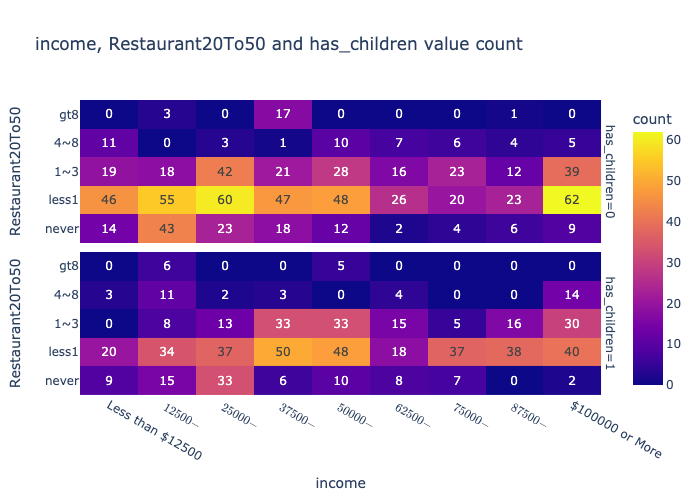

In [78]:
olx = 'income'
coly = 'Restaurant20To50'
facet = 'has_children'
z = 'Y'

fig = px.density_heatmap(data_frame = rest_df,
                        x = colx, y = coly,
                        z = z, histfunc = 'count',
                        facet_row = facet,
                        text_auto = '.0f',
                        labels = {z: 'accepted'},
                        template = 'plotly',
                        title = colx + ', ' + coly + ' and ' + facet + ' value count'
                        )
fig.update_xaxes(categoryorder='array', categoryarray= ['Less than $12500',
                            '$12500 - $24999',
                            '$25000 - $37499',
                            '$37500 - $49999',
                            '$50000 - $62499',
                            '$62500 - $74999', 
                            '$75000 - $87499',
                            '$87500 - $99999',
                            '$100000 or More' ]
                 )
fig.update_yaxes(categoryorder='array', categoryarray= 
                 ['never', 'less1', '1~3', '4~8', 'gt8']
                 )
fig.show('png')

#### Next Steps and Recommendations

- From our findings, it is clear there are ways to improve which drivers to target to get better traction on accepting more expensive restaurant coupons.
- While not exhaustive, based on our findings the following recommendations can help improve targeting efforts by only prompting drivers with coupons as follows:

    1. **When the time is between 10 AM or 2 PM** (driving with a partner or providing a longer coupon expiration time can further improve the acceptance)

    2. **When the driver's occupation is in anything that makes having prepared-from-home meals during the day difficult** (ie.  production occupations, healthcare support, healthcare practicitioner, construction & extraction)
    
    3. **When the driver is known to already frequent bars or expensive restaurants at least once monthly** (choosing lower income drivers (under 50K) or higher income drivers (over 100K) without children can further improve acceptance)

- Possible next steps include

    1. Investigating the remaining coupon group, coffee house, which also has lower than average acceptance rate.

    2. Producing a machine learning model to help predict and select drivers to present more expensive restaurant coupons to, using the above observations as a starting point for feature selection.

    3. Acquiring additional sample survey data to validate observations with low sample counts at lower granularities

